In [2]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import WMAP9 as cosmo
import matplotlib.pyplot as plt

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
rhoc = cosmo.critical_density(0.)

In [4]:
rhoc

<Quantity 9.02592435e-30 g / cm3>

In [5]:
Deltac = 18*np.pi**2 + 82*(cosmo.Om0-1.)-39.*(cosmo.Om0-1)**2

In [6]:
Deltac

99.29167146960845

In [9]:
Rvir(6e14*u.Msun).to(u.Mpc)

<Quantity 2.21158754 Mpc>

In [10]:
Cvir(6e14*u.Msun)

<Quantity 5.09061079>

In [8]:
def Rvir(Mvir):
    denom = 4*np.pi/3*Deltac*rhoc
    return (Mvir/denom)**(1./3.)

def Cvir(Mvir):
    mterm = (Mvir/(2e12/0.7*u.Msun))**(-0.081)
    zterm = (1)**(-0.71)
    return 7.85*mterm*zterm

In [52]:
def m500(y, Mvir):
    fac = 4*np.pi*rhoc
    rvir = Rvir(Mvir)
    cvir = Cvir(Mvir)
    rs = cvir*rvir
    ## cvir below should be c500!!
    cterm = cvir**3/(np.log(1+cvir)-cvir/(1+cvir))
    deltac = 500*cosmo.Om0/3.
    logfac = np.log(1+y) - y/(1+y)
    return fac*logfac*rs**3*deltac

In [23]:
def new_m500(y, Mvir):
    fac = 4*np.pi*rhoc
    rvir = Rvir(Mvir)
    cvir = Cvir(Mvir)
    rs = rvir/cvir
    ## cvir below should be c500!!
    c500=1.09
    cterm = c500**3/(np.log(1+c500)-c500/(1+c500))
    deltac = 500/3. * cterm
    logfac = np.log(1+c500*y) - c500*y/(1+c500*y)
    return fac*logfac*rs**3*deltac

In [53]:
ys = np.linspace(0,1,100)

In [54]:
m500(1.0, 6e14*u.Msun)

<Quantity 2.20562215e+16 solMass>

In [24]:
new_m500(1.0, 6e14*u.Msun)

<Quantity 2.96604848e+13 solMass>

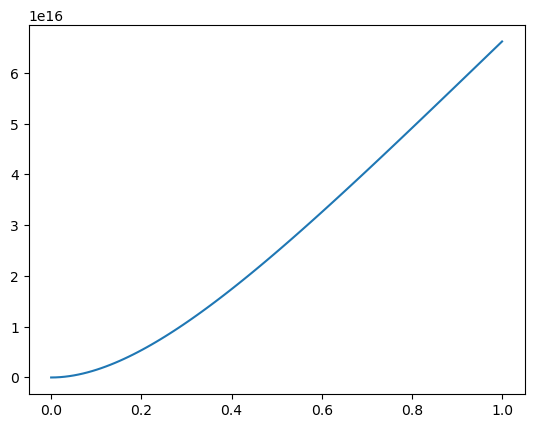

In [48]:
plt.plot(ys, m500(ys, 6e14*u.Msun))